Here i have done the practice of excercise 4.9. in the later part of the code, i have imported custmer order and products megred data and worked on question 3 onwards.

# importing libraries

In [7]:
#import pandas, numpy, os, seaborn, matplotlib and scipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
pathk=r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/02 Data'

In [9]:
df_merged=pd.read_pickle(os.path.join(pathk,'Prepared Data','orders_merged_flagged.pkl'))

In [5]:
df_merged.shape

(32404859, 20)

# Plotting charts

<AxesSubplot:>

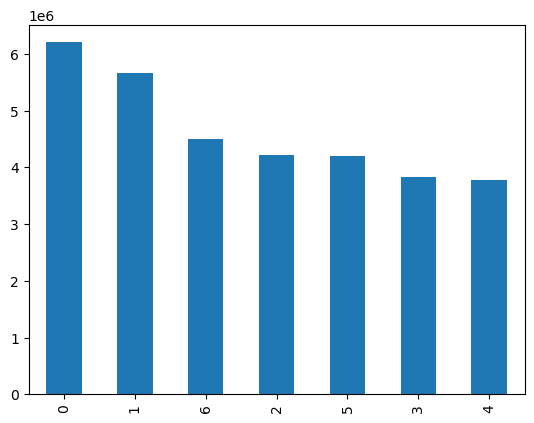

In [10]:
df_merged['Order_day_of_the_week'].value_counts().plot.bar()

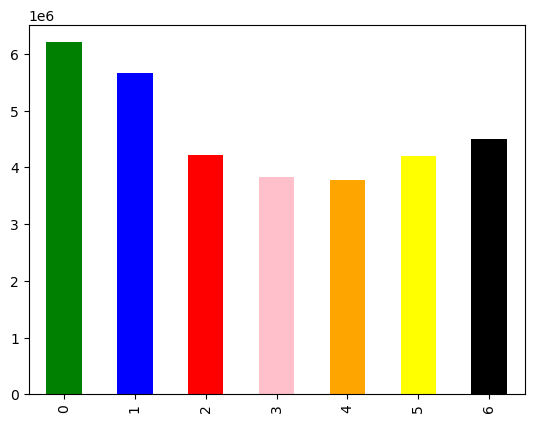

In [11]:
#bar chart in colours
bar_colour=df_merged['Order_day_of_the_week'].value_counts().sort_index().plot.bar(color=['green','blue','red','pink','orange','yellow','black'])

In [12]:
#saving bar charts into pic
bar_colour.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/bar_orders_dow_color.png')

In [ ]:
#histogram
df_merged['prices'].plot.hist(bins = 3)

In [ ]:
#scatterplot on prices
sns.scatterplot(x = 'prices', y = 'prices',data = df_merged)

In [ ]:
#prices check
df_merged.loc[df_merged['prices'] > 100]

In [ ]:
#assigning prices above 100 as Nan as they are outliers
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [ ]:
#checking on scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_merged)

In [ ]:
#plotting histogram
df_merged['prices'].plot.hist(bins = 25)

# Sampling data

In [ ]:
np.random.seed(4)

In [ ]:
#creating sample of 70/30
dev=np.random.rand(len(df_merged))<=0.7

In [ ]:
#dataframe of 70% data
big=df_merged[dev]

In [ ]:
#30% data frame
small=df_merged[~dev]

In [ ]:
big.head()

In [ ]:
df_merged.shape

In [ ]:
#checking the data count
len(big)+len(small)

In [ ]:
#creating subset to draw line chart from small data set

df_2 = small[['Order_day_of_the_week','prices']]

In [ ]:
df_2

In [ ]:
line = sns.lineplot(data = df_2, x = 'Order_day_of_the_week',y = 'prices')

In [ ]:
df_3 = df_merged[['Order_day_of_the_week','prices']]

In [ ]:
line_full= sns.lineplot(data=df_3,x='Order_day_of_the_week',y='prices')

# visulizations for exercise part 2 , question 3

In [ ]:
#importing customer,orders and products combined data

In [6]:
df_fin_merge=pd.read_pickle(os.path.join(pathk,'Prepared Data','final_data.pkl'))

In [ ]:
df_fin_merge.shape

In [ ]:
df_fin_merge.columns

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [ ]:
#histogram for order_hour_of_the_day
hour_hist=df_fin_merge['order_hour_of_day'].plot.hist(bins=48,color='orange')

The histogram shows that the sales are very slow between 0(12 AM) till 5AM. It slowly pickup from 6 and increases and reaches peak at 10AM and stays steady till 16 hours(4 PM) and then slows drops untill 11 PM.

Question 4 : The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [ ]:
loy_bar=df_fin_merge['loyalty_flag'].value_counts().plot.bar(color=('green'))

Question 5 : Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
    (Hint: To check this, you need to use an accurate sample for your line chart!)

In [ ]:
#creating dataframe with only order hours of day and prices
df_fin_merge_prhr=df_fin_merge[['order_hour_of_day','prices']]

In [ ]:
#creating dataframe with only order hours of day and prices with 30% sample
df_sam_prhr=small[['order_hour_of_day','prices']]

In [ ]:
df_sam_prhr.head()

In [ ]:
df_fin_merge_prhr.head()

In [ ]:
#creating line chart with sample
line_hdpr_sample=sns.lineplot(data=df_sam_prhr,x='order_hour_of_day',y='prices')

In [ ]:
# !!creating line chart with df_fin_merge_prhr
line_hdpr=sns.lineplot(data=df_fin_merge_prhr,x='order_hour_of_day',y='prices')

Early mornings are when the high price items are ordered compared to rest of the day.sometimes between 11 PM and 2-3 AM is when very less expensive products are bought.

Question 6: conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [ ]:
#creating sample in the final merged data
np.random.seed(4)

In [ ]:
fin=np.random.rand(len(df_fin_merge))<=0.7

In [ ]:
#creating subsets of 70 and 30 using random function
big_fin=df_fin_merge[fin]
small_fin=df_fin_merge[~fin]

In [ ]:
len(big_fin)+len(small_fin)

In [ ]:
#creating age and dependents sub set
df_sam_agedep=small_fin[['age','dependents_nbr']]

In [ ]:
line_sam_agedep = sns.lineplot(data=df_sam_agedep,x='age',y='dependents_nbr')
line_sam_agedep.yaxis.get_major_locator().set_params(integer=True)

In [ ]:
from matplotlib.ticker import MaxNLocator

line_sam_agedep = plt.figure().gca()
line_sam_agedep=sns.lineplot(data=df_sam_agedep,x='age',y='dependents_nbr')
plt.ylim(0, 5)

In [ ]:
df_sam_agedep.describe()

In [ ]:
#creating line plot with sample data
line_sam_agedep=sns.lineplot(data=df_sam_agedep,x='age',y='dependents_nbr')

In [ ]:
#creating age and dependents from merged data

df_agedep=df_fin_merge[['age','dependents_nbr']]

In [ ]:
#creating line plot with sample data
line_gedep=sns.lineplot(data=df_agedep,x='age',y='dependents_nbr')

The graph does not show any clear relation between age and dependents. however, i feel the column dependents_nbr should be changed to integer for proper representation.

Question 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [ ]:
#sample for scatterplot
scat_sam_agein=small_fin[['age','income']]

In [ ]:
#subset from merged_data
scat_agein=df_fin_merge[['age','income']]

In [ ]:
#scattterplot for the sample data
scat_sam=sns.scatterplot(x = 'age', y = 'income',data = scat_sam_agein)

In [ ]:
#scattterplot for the final data
scat_merge=sns.scatterplot(x = 'age', y = 'income',data = scat_agein)

both scatterpot of sample and full data shows that most customers are between 0 to 200000 income category and after that we can see sparse customers.there are less high income customers in age between 20-40.most high income customers are 40+ age group. however there isnot much co-relation between age and income.

# exporting all visualization into png

In [ ]:
#saving histogram of hour of day
hour_hist.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/histogram_hour_of_day.png')


In [ ]:
#saving bar chart of loyality
loy_bar.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/loyalty_bar_chart.png')


In [ ]:
#saving hour to price line chart sapmple data

line_hdpr_sample.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/price_to_hr_line_sample.png')


In [ ]:
#saving hour to price line chart full data
line_hdpr.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/price_to_hr_line_fin.png')


In [ ]:
#saving age to dependent line chart sample
line_sam_agedep.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/age_to_dep_line_sample.png')


In [ ]:
#saving age to dependent line chart full data
line_gedep.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/age_to_dep_line_full.png')


In [ ]:
#saving age to imcome line chart sample data
scat_sam.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/age_to_income_line_sample.png')


In [ ]:
#saving age to income line chart full data
scat_merge.figure.savefig(r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization/age_to_income_line_full_data.png')
